## Parte 1: Matriz de confusión

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def confusion_matrix(y_actual, y_predicted, positive_label, show=False):
    # Construye una matriz de confusión (binaria)
    # y_actual es la secuencia de etiquetas reales
    # y_predicted es la secuencia de etiquetas predichas por el clasificador
    # positive_label indica cuál es la etiqueta considerada positiva.
    n = len(y_actual)

    tp = sum([y_actual[i] == positive_label and y_actual[i] == y_predicted[i] for i in range(len(y_actual))])  # verdaderos positivos
    tn = sum([y_actual[i] != positive_label and y_actual[i] == y_predicted[i] for i in range(len(y_actual))])  # verdaderos negativos
    fp = sum([y_actual[i] != positive_label and y_actual[i] != y_predicted[i] for i in range(len(y_actual))])  # falsos positivos
    fn = sum([y_actual[i] == positive_label and y_actual[i] != y_predicted[i] for i in range(len(y_actual))])  # falsos negativos
    
    if show:
        display(pd.DataFrame([[tp, tn], [fp, fn]], index=["real +", "real -"], columns=["pred +", "pred -"]))
        
        
    return tp, tn, fp, fn


In [10]:
y_actual = ["spam"] * 10 + ["no-spam"] * 978 + ["spam"] * 2
y_pred = ["spam"] * 2 + ["no-spam"] * 900 + ["spam"] * 20 + ["no-spam"] * 68
tp, tn, fp, fn = confusion_matrix(y_actual=y_actual, y_predicted=y_pred, positive_label="spam")

print("Test 1")
print("(tp, tn, fp, fn) = ", (tp, tn, fp, fn))
assert((tp, tn, fp, fn) == (2, 958, 20, 10))
print("OK")

Test 1
(tp, tn, fp, fn) =  (2, 958, 20, 10)
OK


## Parte 2: Métricas


In [16]:
def accuracy_score(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)


def precision_score(tp, tn, fp, fn):
    return tp / (tp + fp)


def recall_score(tp, tn, fp, fn):
    return tp / (tp + fn)


def f_beta_score(tp, tn, fp, fn, beta):
    prec = precision_score(tp, tn, fp, fn)
    recl = recall_score(tp, tn, fp, fn)
    return (1 + pow(beta,2)) * (prec * recl / (pow(beta, 2) * prec + recl))


def f1_score(tp, tn, fp, fn):
    return f_beta_score(tp, tn, fp, fn, beta=1)


def all_metrics(tp, tn, fp, fn):
    accuracy = round(accuracy_score(tp, tn, fp, fn), 3)
    precision = round(precision_score(tp, tn, fp, fn), 3)
    recall = round(recall_score(tp, tn, fp, fn), 3)
    f1 = round(f1_score(tp, tn, fp, fn), 3)
    return accuracy, precision, recall, f1


In [17]:
tp, tn, fp, fn = confusion_matrix(y_actual=y_actual, y_predicted=y_pred, positive_label="spam")
(accuracy, precision, recall, f1) = all_metrics(tp, tn, fp, fn)

print("Test 2")
print("(accuracy, precision, recall, f1) = ", (accuracy, precision, recall, f1))
assert((accuracy, precision, recall, f1) == (0.97, 0.091, 0.167, 0.118))
print("OK")

Test 2
(accuracy, precision, recall, f1) =  (0.97, 0.091, 0.167, 0.118)
OK


## Parte 3

In [19]:
# Etiquetas reales
y_actual = ["perro"] * 18 + ["gato"] * 980 + ["perro"] * 5

# Etiquetas devueltas por "clasificador A"
y_pred_1 = ["gato"] * 980 + ["perro"] * 20 + ["gato"] * 3

# Etiquetas devueltas por "clasificador B"
y_pred_2 = ["perro"] * 40 + ["gato"] * 900 + ["perro"] * 60 + ["gato"] * 3

res = []
tp, tn, fp, fn = confusion_matrix(y_actual=y_actual, y_predicted=y_pred_1, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

tp, tn, fp, fn = confusion_matrix(y_actual=y_actual, y_predicted=y_pred_1, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

tp, tn, fp, fn = confusion_matrix(y_actual=y_actual, y_predicted=y_pred_1, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

tp, tn, fp, fn = confusion_matrix(y_actual=y_actual, y_predicted=y_pred_1, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

pd.DataFrame(res, columns=["accuracy", "precision", "recall", "f1"], index=["CLF A (gato)", "CLF B (gato)", "CLF A (perro)", "CLF B (perro)"])

,pred +,pred -
real +,962,2
real -,21,18


,pred +,pred -
real +,962,2
real -,21,18


,pred +,pred -
real +,2,962
real -,18,21


,pred +,pred -
real +,2,962
real -,18,21


,accuracy,precision,recall,f1
CLF A (gato),0.961,0.979,0.982,0.980
CLF B (gato),0.961,0.979,0.982,0.980
CLF A (perro),0.961,0.100,0.087,0.093
CLF B (perro),0.961,0.100,0.087,0.093


## Parte 4

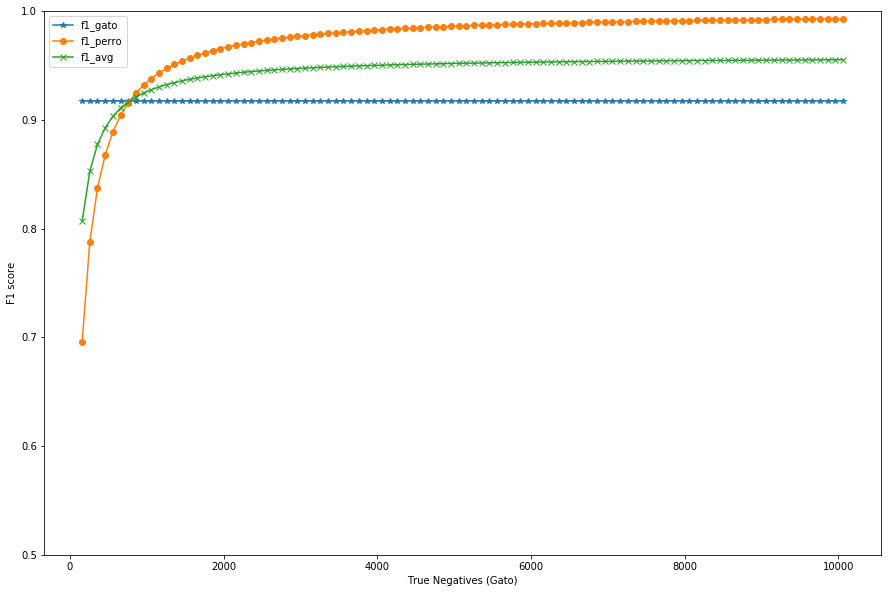

In [20]:
plt.figure(figsize=(15, 10))
y_actual = ["perro"] * 100 + ["gato"] * 900 + ["perro"] * 80
y_pred =   ["perro"] * 80 + ["gato"] * 800 + ["perro"] * 200

tns_gato = []
f1s_gato = []
f1s_perro = []
f1s_avg = []


for i in range(0, 10000, 100):
    y_actual_2 = y_actual + ["perro"] * i
    y_pred_2 = y_pred + ["perro"] * i

    tp1, tn1, fp1, fn1 = confusion_matrix(y_actual=y_actual_2, y_predicted=y_pred_2, positive_label="gato")
    tp2, tn2, fp2, fn2 = confusion_matrix(y_actual=y_actual_2, y_predicted=y_pred_2, positive_label="perro")

    f1_gato = f1_score(tp1, tn1, fp1, fn1)
    f1_perro = f1_score(tp2, tn2, fp2, fn2)
    f1_avg = (f1_gato + f1_perro) / 2

    tns_gato.append(tn1)
    f1s_gato.append(f1_gato)
    f1s_perro.append(f1_perro)
    f1s_avg.append(f1_avg)

plt.plot(tns_gato, f1s_gato, "*-", label="f1_gato")
plt.plot(tns_gato, f1s_perro, "o-", label="f1_perro")
plt.plot(tns_gato, f1s_avg, "x-", label="f1_avg")
plt.xlabel("True Negatives (Gato)")
plt.ylabel("F1 score")
plt.ylim([0.5,1])
plt.legend()
plt.show()
